# Análisis Exploratorio de Datos - Exoplanetas NASA/Kepler

Este notebook analiza los datos de exoplanetas candidatos y confirmados del telescopio Kepler.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [4]:
# Cargar el dataset
df = pd.read_csv('selectedData.csv')

# Ver las primeras filas
print("=" * 80)
print("PRIMERAS 5 FILAS DEL DATASET")
print("=" * 80)
df.head()

PRIMERAS 5 FILAS DEL DATASET


,loc_rowid,kepid,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,ra,dec,koi_kepmag
0,1,10797460,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,2.775000e-05,...,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,291.93423,48.141651,15.347
1,2,10797460,CONFIRMED,CANDIDATE,0,0,0,0,54.418383,2.479000e-04,...,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,291.93423,48.141651,15.347
2,3,10811496,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,1.494000e-05,...,-0.30,0.868,0.233,-0.078,0.961,0.110,-0.121,297.00482,48.134129,15.436
3,4,10848459,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,...,-0.30,0.791,0.201,-0.067,0.836,0.093,-0.077,285.53461,48.285210,15.597
4,5,10854555,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,3.761000e-06,...,-0.30,1.046,0.334,-0.133,1.095,0.151,-0.136,288.75488,48.226200,15.509


In [5]:
# Información general del dataset
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nNombres de las columnas:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "=" * 80)
print("TIPOS DE DATOS")
print("=" * 80)
df.info()


INFORMACIÓN GENERAL DEL DATASET

Dimensiones del dataset: 9564 filas x 64 columnas

Nombres de las columnas:
   1. loc_rowid
   2. kepid
   3. koi_disposition
   4. koi_pdisposition
   5. koi_fpflag_nt
   6. koi_fpflag_ss
   7. koi_fpflag_co
   8. koi_fpflag_ec
   9. koi_period
  10. koi_period_err1
  11. koi_period_err2
  12. koi_eccen
  13. koi_impact
  14. koi_impact_err1
  15. koi_impact_err2
  16. koi_duration
  17. koi_duration_err1
  18. koi_duration_err2
  19. koi_depth
  20. koi_depth_err1
  21. koi_depth_err2
  22. koi_ror
  23. koi_ror_err1
  24. koi_ror_err2
  25. koi_srho
  26. koi_srho_err1
  27. koi_srho_err2
  28. koi_prad
  29. koi_prad_err1
  30. koi_prad_err2
  31. koi_sma
  32. koi_incl
  33. koi_teq
  34. koi_insol
  35. koi_insol_err1
  36. koi_insol_err2
  37. koi_dor
  38. koi_dor_err1
  39. koi_dor_err2
  40. koi_max_sngle_ev
  41. koi_max_mult_ev
  42. koi_model_snr
  43. koi_count
  44. koi_num_transits
  45. koi_quarters
  46. koi_bin_oedp_sig
  47. koi_ste

In [6]:
# Verificar valores nulos
print("=" * 80)
print("VALORES NULOS POR COLUMNA")
print("=" * 80)
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100
resumen_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Porcentaje': porcentaje_nulos
})
# Mostrar solo columnas con valores nulos
resumen_nulos[resumen_nulos['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

VALORES NULOS POR COLUMNA


,Valores_Nulos,Porcentaje
koi_bin_oedp_sig,1510,15.788373
koi_max_sngle_ev,1142,11.940611
koi_max_mult_ev,1142,11.940611
koi_num_transits,1142,11.940611
koi_quarters,1142,11.940611
koi_steff_err2,483,5.050188
koi_steff_err1,468,4.893350
koi_slogg_err2,468,4.893350
koi_smass_err2,468,4.893350
koi_srad_err1,468,4.893350


In [7]:
# Conteo de exoplanetas por disposición
print("=" * 80)
print("DISTRIBUCIÓN DE DISPOSICIÓN DE EXOPLANETAS")
print("=" * 80)
disposition_counts = df['koi_disposition'].value_counts()
print(disposition_counts)
print(f"\nTotal de registros: {len(df)}")
print(f"\nPorcentajes:")
print(df['koi_disposition'].value_counts(normalize=True) * 100)

DISTRIBUCIÓN DE DISPOSICIÓN DE EXOPLANETAS
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Total de registros: 9564

Porcentajes:
koi_disposition
FALSE POSITIVE    50.595985
CONFIRMED         28.711836
CANDIDATE         20.692179
Name: proportion, dtype: float64


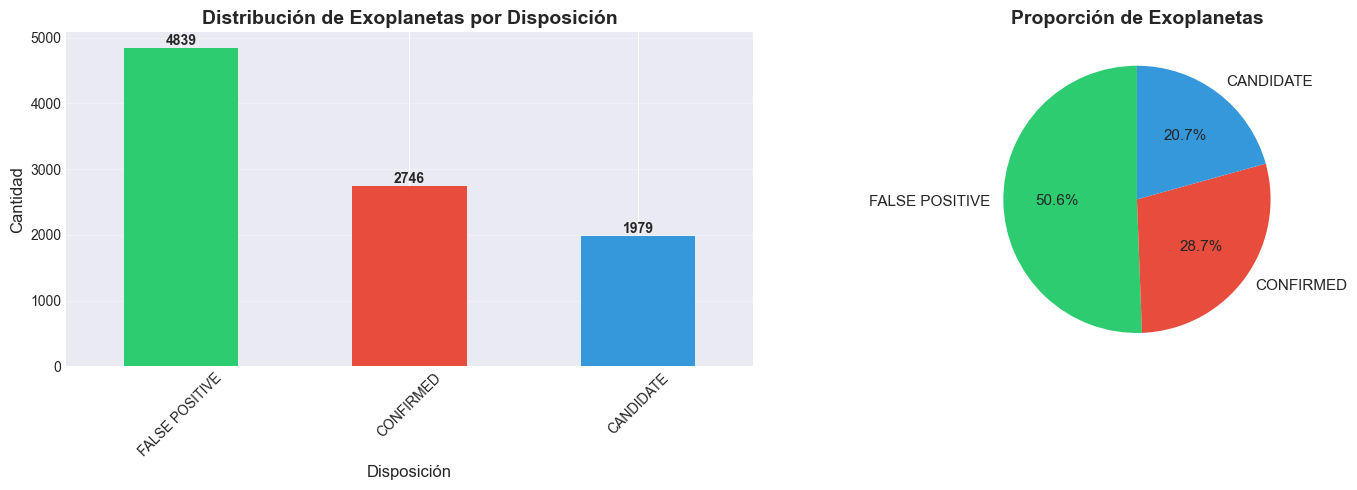

In [8]:
# Gráfico de barras: Disposición de exoplanetas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
disposition_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c', '#3498db'])
axes[0].set_title('Distribución de Exoplanetas por Disposición', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Disposición', fontsize=12)
axes[0].set_ylabel('Cantidad', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(disposition_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c', '#3498db']
axes[1].pie(disposition_counts, labels=disposition_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 11})
axes[1].set_title('Proporción de Exoplanetas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
# Análisis del periodo orbital (koi_period)
print("=" * 80)
print("ESTADÍSTICAS DEL PERIODO ORBITAL (días)")
print("=" * 80)
print(df['koi_period'].describe())
print(f"\nValores nulos: {df['koi_period'].isnull().sum()}")

ESTADÍSTICAS DEL PERIODO ORBITAL (días)
count      9564.000000
mean         75.671358
std        1334.744046
min           0.241843
25%           2.733684
50%           9.752831
75%          40.715178
max      129995.778400
Name: koi_period, dtype: float64

Valores nulos: 0


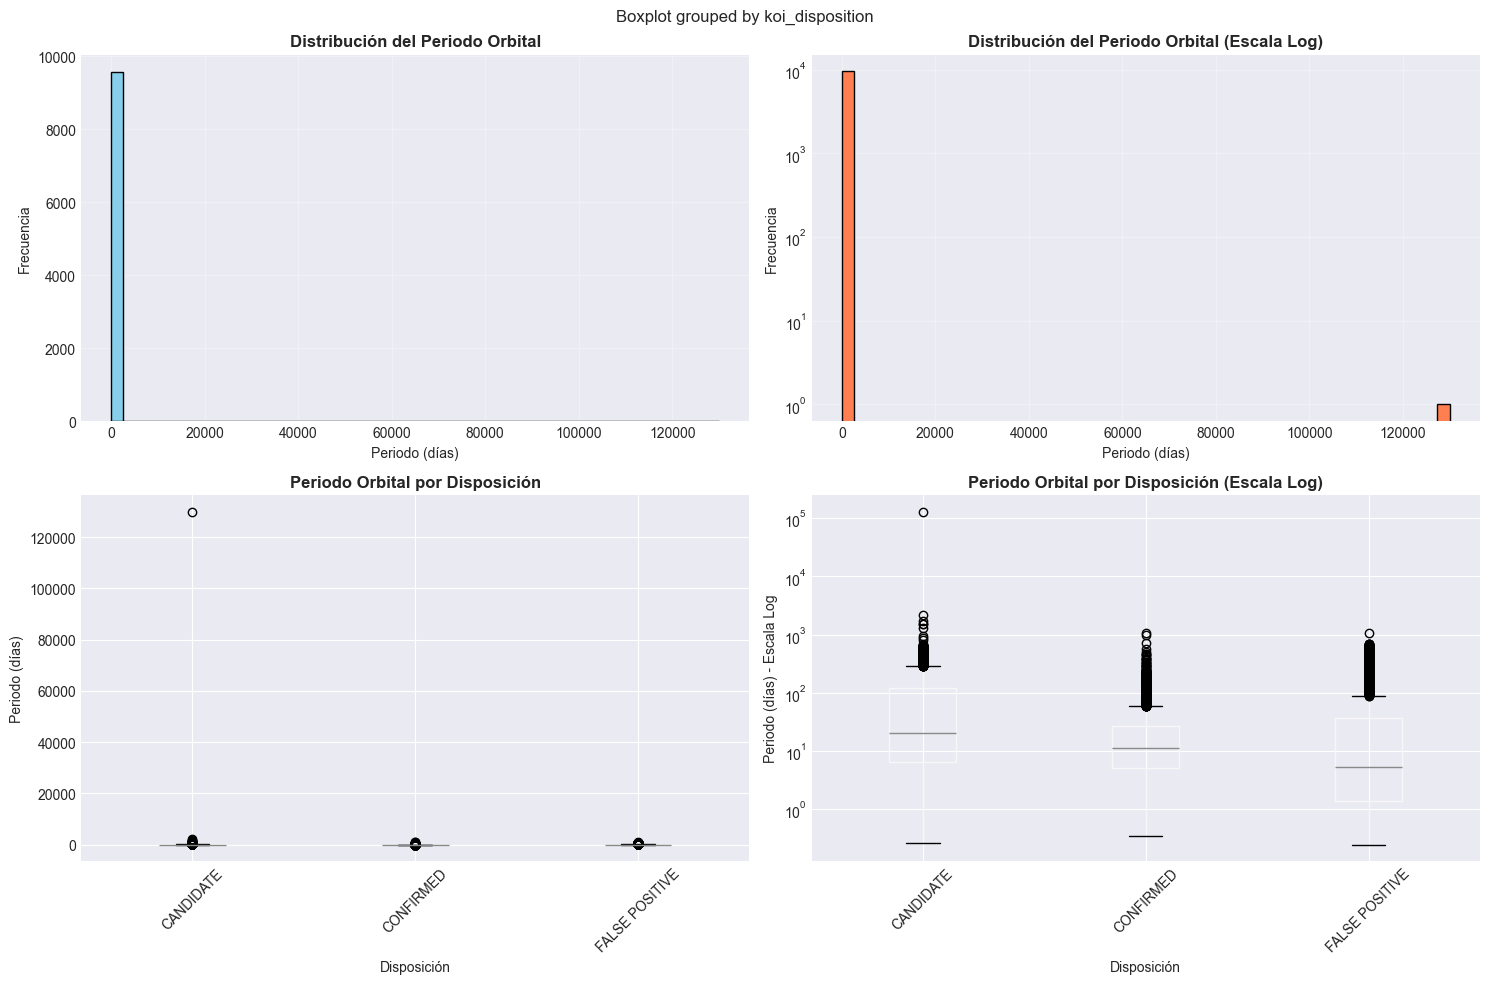

In [10]:
# Visualización del periodo orbital
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma del periodo orbital
axes[0, 0].hist(df['koi_period'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución del Periodo Orbital', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Periodo (días)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(alpha=0.3)

# Histograma del periodo orbital (escala logarítmica)
axes[0, 1].hist(df['koi_period'].dropna(), bins=50, color='coral', edgecolor='black')
axes[0, 1].set_title('Distribución del Periodo Orbital (Escala Log)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Periodo (días)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(alpha=0.3)

# Boxplot del periodo orbital por disposición
df.boxplot(column='koi_period', by='koi_disposition', ax=axes[1, 0])
axes[1, 0].set_title('Periodo Orbital por Disposición', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Disposición')
axes[1, 0].set_ylabel('Periodo (días)')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Boxplot con escala logarítmica
df.boxplot(column='koi_period', by='koi_disposition', ax=axes[1, 1])
axes[1, 1].set_title('Periodo Orbital por Disposición (Escala Log)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Disposición')
axes[1, 1].set_ylabel('Periodo (días) - Escala Log')
axes[1, 1].set_yscale('log')
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

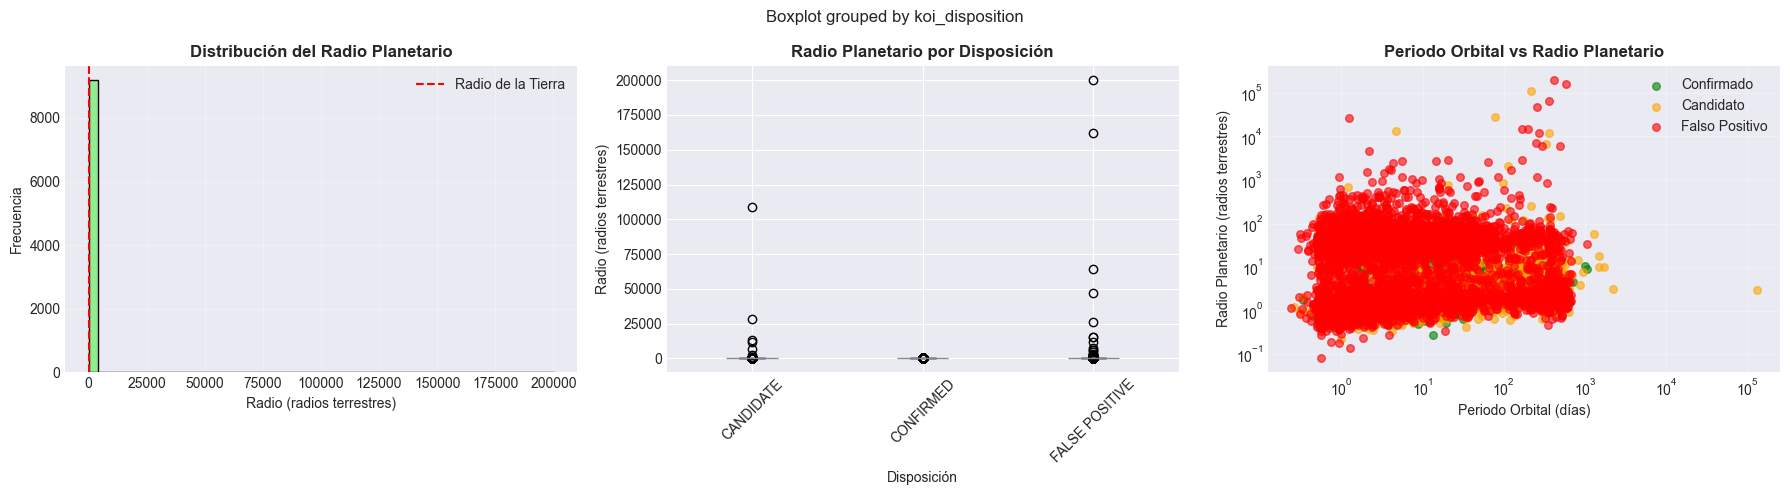

In [11]:
# Visualización del radio planetario
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma del radio planetario
axes[0].hist(df['koi_prad'].dropna(), bins=50, color='lightgreen', edgecolor='black')
axes[0].set_title('Distribución del Radio Planetario', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Radio (radios terrestres)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(x=1, color='red', linestyle='--', label='Radio de la Tierra')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot del radio planetario por disposición
df.boxplot(column='koi_prad', by='koi_disposition', ax=axes[1])
axes[1].set_title('Radio Planetario por Disposición', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Disposición')
axes[1].set_ylabel('Radio (radios terrestres)')
plt.sca(axes[1])
plt.xticks(rotation=45)

# Scatter plot: Periodo vs Radio
confirmed = df[df['koi_disposition'] == 'CONFIRMED']
candidate = df[df['koi_disposition'] == 'CANDIDATE']
false_positive = df[df['koi_disposition'] == 'FALSE POSITIVE']

axes[2].scatter(confirmed['koi_period'], confirmed['koi_prad'], 
                alpha=0.6, s=30, label='Confirmado', color='green')
axes[2].scatter(candidate['koi_period'], candidate['koi_prad'], 
                alpha=0.6, s=30, label='Candidato', color='orange')
axes[2].scatter(false_positive['koi_period'], false_positive['koi_prad'], 
                alpha=0.6, s=30, label='Falso Positivo', color='red')
axes[2].set_title('Periodo Orbital vs Radio Planetario', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Periodo Orbital (días)')
axes[2].set_ylabel('Radio Planetario (radios terrestres)')
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Análisis de la temperatura estelar
print("=" * 80)
print("ESTADÍSTICAS DE LA TEMPERATURA ESTELAR (K)")
print("=" * 80)
print(df['koi_steff'].describe())
print(f"\nValores nulos: {df['koi_steff'].isnull().sum()}")

# Análisis del radio estelar
print("\n" + "=" * 80)
print("ESTADÍSTICAS DEL RADIO ESTELAR (radios solares)")
print("=" * 80)
print(df['koi_srad'].describe())
print(f"\nValores nulos: {df['koi_srad'].isnull().sum()}")

ESTADÍSTICAS DE LA TEMPERATURA ESTELAR (K)
count     9201.000000
mean      5706.823280
std        796.857947
min       2661.000000
25%       5310.000000
50%       5767.000000
75%       6112.000000
max      15896.000000
Name: koi_steff, dtype: float64

Valores nulos: 363

ESTADÍSTICAS DEL RADIO ESTELAR (radios solares)
count    9201.000000
mean        1.728712
std         6.127185
min         0.109000
25%         0.829000
50%         1.000000
75%         1.345000
max       229.908000
Name: koi_srad, dtype: float64

Valores nulos: 363


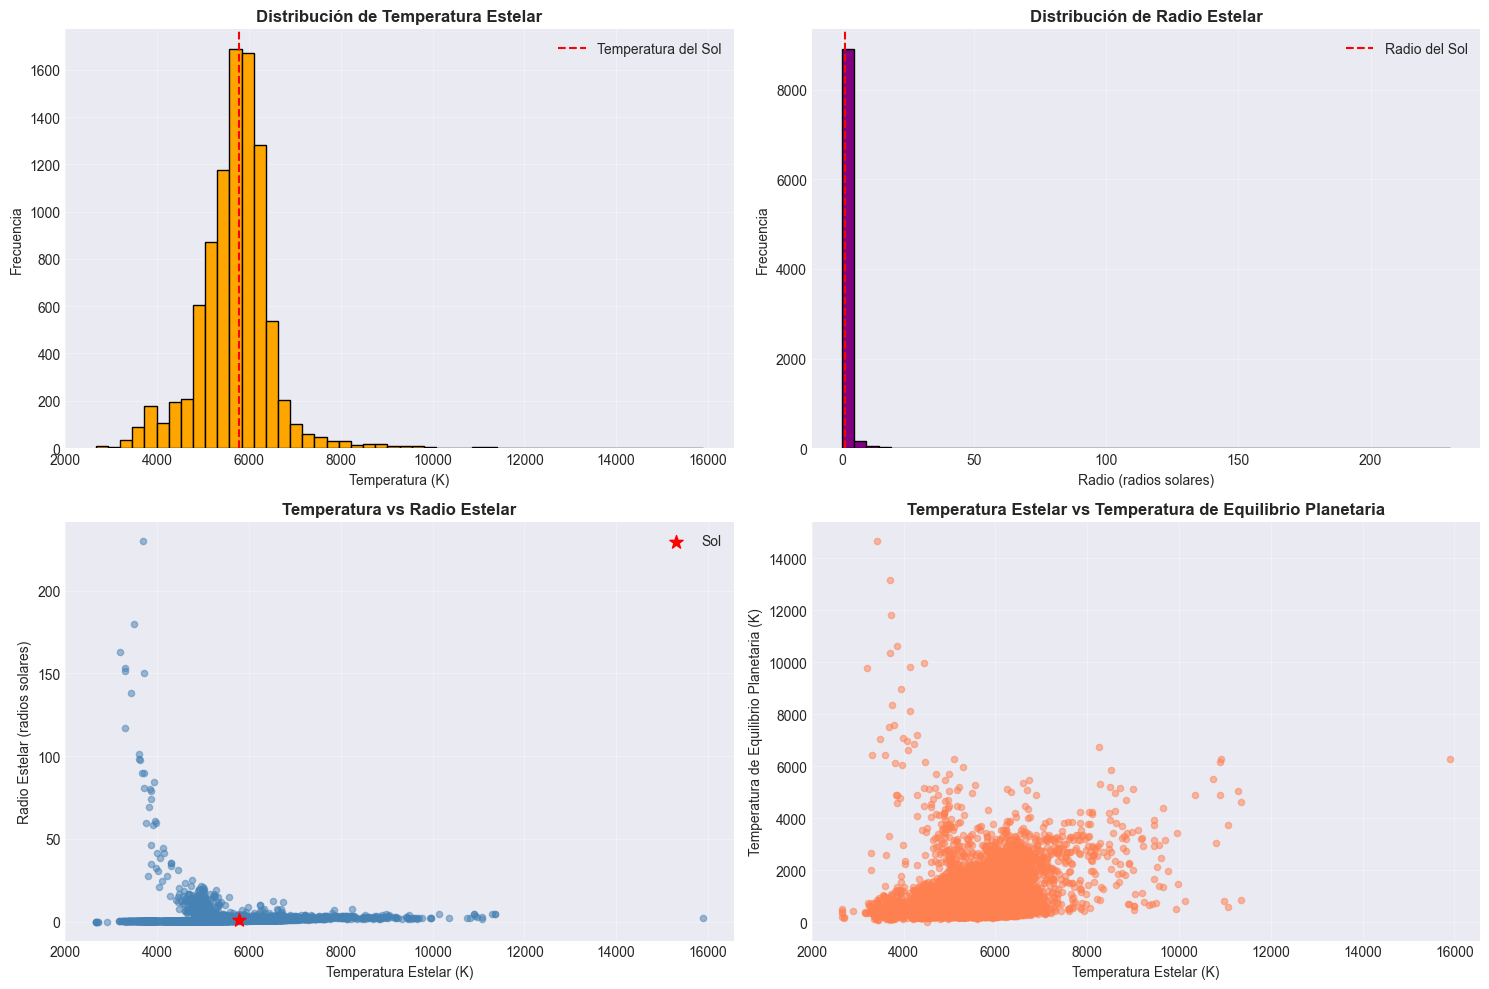

In [13]:
# Visualización de características estelares
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de temperatura estelar
axes[0, 0].hist(df['koi_steff'].dropna(), bins=50, color='orange', edgecolor='black')
axes[0, 0].set_title('Distribución de Temperatura Estelar', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Temperatura (K)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(x=5778, color='red', linestyle='--', label='Temperatura del Sol')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histograma de radio estelar
axes[0, 1].hist(df['koi_srad'].dropna(), bins=50, color='purple', edgecolor='black')
axes[0, 1].set_title('Distribución de Radio Estelar', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Radio (radios solares)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(x=1, color='red', linestyle='--', label='Radio del Sol')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Scatter plot: Temperatura vs Radio estelar
axes[1, 0].scatter(df['koi_steff'], df['koi_srad'], alpha=0.5, s=20, color='steelblue')
axes[1, 0].set_title('Temperatura vs Radio Estelar', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Temperatura Estelar (K)')
axes[1, 0].set_ylabel('Radio Estelar (radios solares)')
axes[1, 0].scatter([5778], [1], color='red', s=100, marker='*', label='Sol', zorder=5)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Scatter plot: Temperatura estelar vs Temperatura de equilibrio del planeta
axes[1, 1].scatter(df['koi_steff'], df['koi_teq'], alpha=0.5, s=20, color='coral')
axes[1, 1].set_title('Temperatura Estelar vs Temperatura de Equilibrio Planetaria', 
                      fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Temperatura Estelar (K)')
axes[1, 1].set_ylabel('Temperatura de Equilibrio Planetaria (K)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

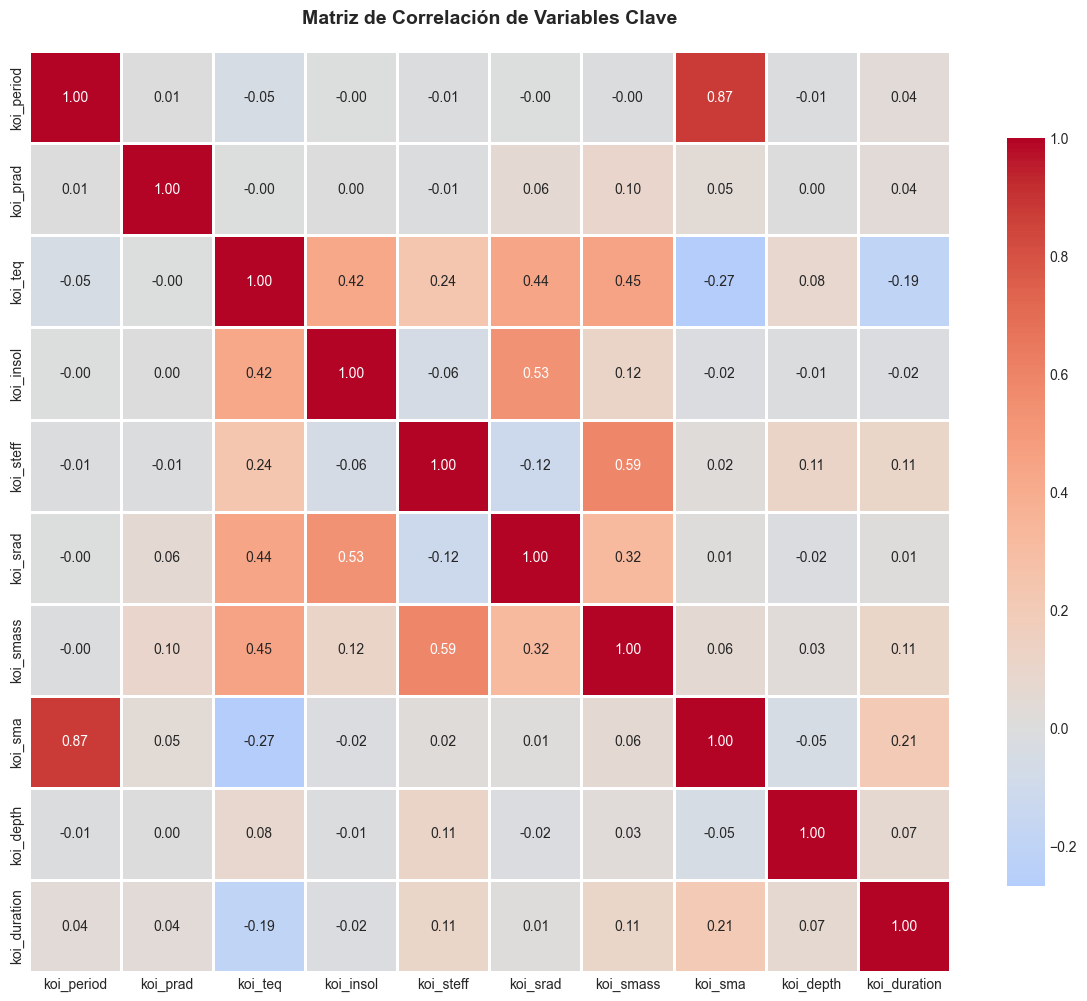

CORRELACIONES MÁS FUERTES (|r| > 0.5)
Variable 1 Variable 2  Correlación
koi_period    koi_sma     0.871817
 koi_steff  koi_smass     0.586926
 koi_insol   koi_srad     0.530914


In [14]:
# Seleccionar columnas numéricas clave para análisis de correlación
columnas_interes = ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 
                     'koi_steff', 'koi_srad', 'koi_smass', 'koi_sma', 
                     'koi_depth', 'koi_duration']

# Crear subset con estas columnas
df_correlacion = df[columnas_interes].copy()

# Calcular la matriz de correlación
correlacion = df_correlacion.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables Clave', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("=" * 80)
print("CORRELACIONES MÁS FUERTES (|r| > 0.5)")
print("=" * 80)
# Encontrar las correlaciones más fuertes
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:
            correlaciones_fuertes.append({
                'Variable 1': correlacion.columns[i],
                'Variable 2': correlacion.columns[j],
                'Correlación': correlacion.iloc[i, j]
            })

df_correlaciones = pd.DataFrame(correlaciones_fuertes)
df_correlaciones = df_correlaciones.sort_values('Correlación', key=abs, ascending=False)
print(df_correlaciones.to_string(index=False))

In [15]:
# Resumen completo del dataset
print("=" * 80)
print("RESUMEN COMPLETO DEL DATASET DE EXOPLANETAS")
print("=" * 80)

print("\n📊 DIMENSIONES:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Total de columnas: {len(df.columns)}")

print("\n🌍 DISPOSICIÓN DE EXOPLANETAS:")
for disposition, count in df['koi_disposition'].value_counts().items():
    porcentaje = (count / len(df)) * 100
    print(f"   • {disposition}: {count:,} ({porcentaje:.1f}%)")

print("\n🪐 CARACTERÍSTICAS PLANETARIAS:")
print(f"   • Periodo orbital promedio: {df['koi_period'].mean():.2f} días")
print(f"   • Radio planetario promedio: {df['koi_prad'].mean():.2f} radios terrestres")
print(f"   • Temperatura de equilibrio promedio: {df['koi_teq'].mean():.2f} K")

print("\n⭐ CARACTERÍSTICAS ESTELARES:")
print(f"   • Temperatura estelar promedio: {df['koi_steff'].mean():.2f} K")
print(f"   • Radio estelar promedio: {df['koi_srad'].mean():.2f} radios solares")
print(f"   • Masa estelar promedio: {df['koi_smass'].mean():.2f} masas solares")

print("\n🔍 COMPLETITUD DE DATOS:")
columnas_con_nulos = df.isnull().sum()[df.isnull().sum() > 0]
print(f"   • Columnas con valores nulos: {len(columnas_con_nulos)} de {len(df.columns)}")
porcentaje_completo = ((len(df.columns) - len(columnas_con_nulos)) / len(df.columns)) * 100
print(f"   • Completitud general: {porcentaje_completo:.1f}%")

print("\n" + "=" * 80)

RESUMEN COMPLETO DEL DATASET DE EXOPLANETAS

📊 DIMENSIONES:
   • Total de registros: 9,564
   • Total de columnas: 64

🌍 DISPOSICIÓN DE EXOPLANETAS:
   • FALSE POSITIVE: 4,839 (50.6%)
   • CONFIRMED: 2,746 (28.7%)
   • CANDIDATE: 1,979 (20.7%)

🪐 CARACTERÍSTICAS PLANETARIAS:
   • Periodo orbital promedio: 75.67 días
   • Radio planetario promedio: 102.89 radios terrestres
   • Temperatura de equilibrio promedio: 1085.39 K

⭐ CARACTERÍSTICAS ESTELARES:
   • Temperatura estelar promedio: 5706.82 K
   • Radio estelar promedio: 1.73 radios solares
   • Masa estelar promedio: 1.02 masas solares

🔍 COMPLETITUD DE DATOS:
   • Columnas con valores nulos: 51 de 64
   • Completitud general: 20.3%



## 7. Resumen Final

## 6. Matriz de Correlación

## 5. Análisis de la Estrella Anfitriona

In [16]:
# Análisis del radio planetario (koi_prad)
print("=" * 80)
print("ESTADÍSTICAS DEL RADIO PLANETARIO (radios terrestres)")
print("=" * 80)
print(df['koi_prad'].describe())
print(f"\nValores nulos: {df['koi_prad'].isnull().sum()}")

ESTADÍSTICAS DEL RADIO PLANETARIO (radios terrestres)
count      9201.000000
mean        102.891778
std        3077.639126
min           0.080000
25%           1.400000
50%           2.390000
75%          14.930000
max      200346.000000
Name: koi_prad, dtype: float64

Valores nulos: 363


## 4. Análisis de Características de los Exoplanetas

## 3. Análisis de Disposición de Exoplanetas

In [17]:
# Estadísticas descriptivas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
df.describe()

ESTADÍSTICAS DESCRIPTIVAS


,loc_rowid,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_eccen,...,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9201.0,...,9177.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,0.0,...,-0.252033,1.728712,0.362292,-0.394806,1.023706,0.122801,-0.138824,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,0.0,...,0.085453,6.127185,0.930870,2.168213,0.349447,0.085946,0.178983,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,0.0,...,-0.750000,0.109000,0.000000,-116.137000,0.000000,0.000000,-2.432000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,0.0,...,-0.300000,0.829000,0.129000,-0.250000,0.845000,0.072000,-0.141000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,0.0,...,-0.300000,1.000000,0.251000,-0.111000,0.974000,0.106000,-0.097500,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,0.0,...,-0.150000,1.345000,0.364000,-0.069000,1.101000,0.151000,-0.061000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,0.0,...,0.000000,229.908000,33.091000,0.000000,3.735000,1.500000,0.000000,301.720760,52.336010,20.003000


## 2. Cargar y explorar los datos

## 1. Importar librerías necesarias